In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [3]:
Iris_df=pd.read_csv("Iris.csv")
Iris_df2=Iris_df.sample(n=10)
Iris_df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,44,5.0,3.5,1.6,0.6,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
115,116,6.4,3.2,5.3,2.3,Iris-virginica
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica
39,40,5.1,3.4,1.5,0.2,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
Iris_df.fillna(Iris_df.median())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [5]:
Iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df2=Iris_df.pop("Species")

In [7]:
Iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [8]:
df2.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
L1 = LabelEncoder()
df3=L1.fit_transform(df2)

In [10]:
df4=pd.DataFrame(df3)

In [11]:
Iris_df['Class']=df4

In [12]:
Iris_df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
count,152.000000,151.000000,150.000000,150.000000,151.000000,152.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649,1.013158
std,44.022721,0.825314,0.433594,1.764420,0.762185,0.821780
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.750000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,76.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,114.250000,6.400000,3.300000,5.100000,1.800000,2.000000
max,152.000000,7.900000,4.400000,6.900000,2.500000,2.000000


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [13]:
Iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
Id,1.000000,0.710342,-0.397729,0.882747,0.897900,0.942753
SepalLengthCm,0.710342,1.000000,-0.109369,0.871754,0.817954,0.779245
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.897900,0.817954,-0.356544,0.962757,1.000000,0.956152
Class,0.942753,0.779245,-0.419446,0.949043,0.956152,1.000000


In [14]:
#Since none of the independent variables are having correlation in range -0.1 to 0.1, so none of the variables will be dropped

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [15]:
Iris_df.var()

Id               1938.000000
SepalLengthCm       0.681143
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.580926
Class               0.675322
dtype: float64

In [16]:
# While none of the variables have variance less than 0.1, none of them are dropped

In [17]:
#However since the ID variable is not a dependent variable, will be dropping ID
Iris_df=Iris_df.drop("Id",axis=1)

In [18]:
Iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09B69CB0>,
      dtype=object)

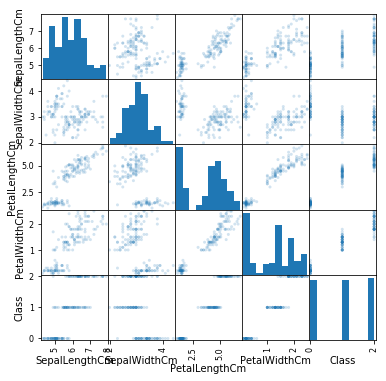

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(Iris_df,alpha=0.2,figsize=(6, 6))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [20]:
Y=Iris_df.pop("Class")
X=Iris_df

In [21]:
X.fillna(X.median())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,4.7,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
5,5.4,3.9,1.70,0.4
6,4.6,3.4,1.40,0.3
7,5.0,3.4,1.50,0.2
8,4.4,2.9,1.40,0.2
9,4.9,3.1,1.50,0.1


In [22]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [28]:
NNHK3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
NNHK3.fit(X_train,Y_train)
predict_Y_k3 = NNH.predict(X_test)
NNHK3.score(X_test,Y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
accuracy_score(Y_test,predict_Y_k3)

NameError: name 'predict_Y_k3' is not defined

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*